## Linear Regression OLS(Ordinary Least Squares)
Ordinary Least Squares (OLS) is a type of linear regression that aims to find the best-fitting line through a set of points by minimizing the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model.

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For linear regression model


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# study_hours: Generate 50 random numbers uniformly distributed between 1 and 10
study_hours = np.random.uniform(1, 10, 50)

# scores: Generate scores using a linear relationship with study_hours
# Add some normally distributed noise with mean 0 and standard deviation 1
scores = 10 - 0.5 * study_hours + np.random.normal(0, 1, 50)

# Create a DataFrame from the generated data
data = pd.DataFrame({"Study hours": study_hours, "Scores": scores})

# Display the first few rows of the DataFrame and the shape of the DataFrame
data.head(), data.shape


(   Study hours    Scores
 0     4.370861  8.553036
 1     9.556429  5.393154
 2     7.587945  6.090379
 3     6.387926  6.504933
 4     2.404168  7.319394,
 (50, 2))

In [3]:
# Separate the features (X) and the target (y)
# X: The independent variable (Study hours) as a DataFrame
# y: The dependent variable (Scores) as a DataFrame
X, y = data[['Study hours']], data[['Scores']]


In [4]:
# Split the data into training and testing sets
# X_train, y_train: Training set (80% of the data)
# X_test, y_test: Testing set (20% of the data)
# test_size=0.2: Specifies that 20% of the data should be used for testing
# random_state=42: Ensures reproducibility by setting a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
type(X_train)

pandas.core.frame.DataFrame

In [6]:
# Reset the index of the training and testing sets
# This ensures that the index is reset to the default integer index, and the original index is dropped

# Reset the index of the training features (X_train)
X_train.reset_index(inplace=True, drop=True)

# Reset the index of the testing features (X_test)
X_test.reset_index(inplace=True, drop=True)

# Reset the index of the training target (y_train)
y_train.reset_index(inplace=True, drop=True)

# Reset the index of the testing target (y_test)
y_test.reset_index(inplace=True, drop=True)

In [7]:
X_train

,Study hours
0,8.491984
1,2.404168
2,1.879049
3,6.410035
4,6.387926
5,1.522753
6,5.456592
7,3.805400
8,5.680612
9,2.650641


In [8]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
# X_train: The training features (Study hours)
# y_train: The training target (Scores)
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Retrieve the slope (coefficient) and intercept from the fitted model
# m: Slope (coefficient) of the linear regression model
# b: Intercept of the linear regression model
m = model.coef_
b = model.intercept_

# Display the slope (m) and intercept (b)
m, b

(array([[-0.53070119]]), array([10.1543722]))

In [10]:
X_test.head()

,Study hours
0,2.911052
1,4.961372
2,6.467904
3,6.962701
4,5.722808


In [11]:
y_test.head()

,Scores
0,9.156150
1,5.531745
2,7.127444
3,6.016893
4,6.829384


In [12]:
# Calculate predicted scores (y_pred) using the coefficients obtained from the model
# m: Slope (coefficient) of the linear regression model
# b: Intercept of the linear regression model
y_pred = m * X_test + b

# Display the predicted scores
y_pred


,Study hours
0,8.609473
1,7.521366
2,6.721848
3,6.459259
4,7.117271
5,7.012413
6,8.669967
7,5.873427
8,9.312964
9,8.232670


In [13]:
# Predict scores using the fitted model on the test data
model.predict(X_test)

array([[8.60947345],
       [7.52136595],
       [6.72184804],
       [6.45925875],
       [7.11727126],
       [7.01241286],
       [8.66996699],
       [5.87342668],
       [9.31296439],
       [8.23267016]])

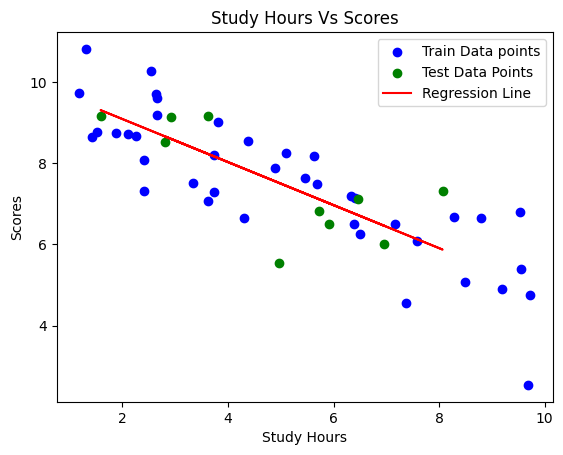

In [14]:
# Scatter plot of training data points
plt.scatter(X_train, y_train, color="blue", label="Train Data points")

# Scatter plot of test data points
plt.scatter(X_test, y_test, color="green", label="Test Data Points")

# Plot the regression line using the model predictions on the test data
plt.plot(X_test, model.predict(X_test), color="red", label="Regression Line")

# Set labels for x-axis and y-axis
plt.xlabel("Study Hours")
plt.ylabel("Scores")

# Set the title of the plot
plt.title("Study Hours Vs Scores")

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Creating Custom Linear Regression

In [15]:
class myCustomLR:
    
    def __init__(self):
        # Initialize coefficients as None
        self.m = None  # Slope
        self.b = None  # Intercept

    def fit(self, X_train, y_train):
        # Fit the model using the training data

        n = X_train.shape[0]  # Number of training samples

        mnum = 0  # Numerator of the slope calculation
        mden = 0  # Denominator of the slope calculation

        x_bar = X_train.mean()  # Mean of X_train
        y_bar = y_train.mean()  # Mean of y_train

        # Calculate numerator and denominator for slope
        for i in range(n):
            mnum = mnum + ((X_train[i] - x_bar) * (y_train[i] - y_bar))
            mden = mden + ((X_train[i] - x_bar) * (X_train[i] - x_bar))

        # Calculate slope (m) and intercept (b)
        self.m = mnum / mden
        self.b = y_bar - self.m * x_bar

        # Print slope and intercept (optional)
        print("Slope:", self.m)
        print("Intercept:", self.b)

    def predict(self, X_test):
        # Predict using the fitted model
        
        # Calculate predicted values using the slope and intercept
        return self.m * X_test + self.b


In [16]:
# Instantiate your custom linear regression model
lr = myCustomLR()

In [17]:
# Fit your custom model to the training data
lr.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

# Retrieve the slope (m) and intercept (b) from the scikit-learn model (assuming they were previously computed)
m, b

Slope: [-0.53070119]
Intercept: [10.1543722]


(array([[-0.53070119]]), array([10.1543722]))

In [18]:
# Predict using your custom model on the test data (X_test)
y_pred_custom = lr.predict(X_test)

# Predict using the scikit-learn model on the test data (X_test)
y_pred_sklearn = model.predict(X_test)

In [19]:
# Display the predicted scores from both models for comparison
y_pred_custom, y_pred_sklearn

(   Study hours
 0     8.609473
 1     7.521366
 2     6.721848
 3     6.459259
 4     7.117271
 5     7.012413
 6     8.669967
 7     5.873427
 8     9.312964
 9     8.232670,
 array([[8.60947345],
        [7.52136595],
        [6.72184804],
        [6.45925875],
        [7.11727126],
        [7.01241286],
        [8.66996699],
        [5.87342668],
        [9.31296439],
        [8.23267016]]))